# Подготовка среды и датасетов

In [71]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

%matplotlib inline

from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [ ]:
plt.rcParams['figure.figsize'] = 12, 8

In [ ]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

In [ ]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])

# KMeans

Интерактивная визуализация работы KMeans – https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Для примера из видео: **Random** $\rightarrow$ **Packed Circles**

![KMeans](https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif "KMeans")

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300
                )

In [ ]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

## Задания

Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [ ]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [ ]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

### Задание 7.5.2

Обучите модель K-means с параметрами n_clusters=3 и random_state=42 на признаках исходного датасета.

Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3,random_state=42)

In [ ]:
k_means.fit(X)
centers = k_means.cluster_centers_

In [ ]:
k_means.labels_

In [ ]:
print(np.round(centers).astype(np.int))

### Задание 7.5.3

Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2. Записывайте строго в таком порядке.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:

In [ ]:
k_pred = k_means.predict(X)

In [ ]:
_,counts = np.unique(k_pred,return_counts=True)
for count in counts:
    print(count, end=' ')

In [ ]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

In [ ]:
k_means_pred

### Задание 7.5.4

In [43]:
df = pd.read_csv(r'C:/Users/wangshu202040/Skill_Notes/Module_6_Clusters/DataSets/snsdata.csv')

In [44]:
df.head(5)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [45]:
df = df.drop(['gradyear','gender','age','friends'], axis=1)
df.head(5)

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [92]:
sc = StandardScaler()
dfX = sc.fit_transform(df)

In [56]:
k_means = KMeans(init='random',n_clusters=9, random_state=123)
k_means.fit(dfX)

KMeans(n_clusters=9, random_state=123)

In [65]:
k_pred = k_means.labels_

In [58]:
cluster_cnt = []
_,counts = np.unique(k_pred,return_counts=True)
for count in counts:
    cluster_cnt.append(count)

In [59]:
cluster_cnt

[5036, 1337, 752, 697, 20024, 1, 846, 466, 841]

In [36]:
df['cluster_label'] = k_pred

In [37]:
for k, group in df.groupby('cluster_label'):
    print(k)
    top_words = group.iloc[:,:-1].mean()\
                 .sort_values(ascending=False)\
                 .head(10)
    print(top_words)

0
music         1.066521
dance         1.051033
shopping      0.890191
cute          0.828435
basketball    0.722597
hair          0.691223
mall          0.652502
football      0.617752
god           0.573272
church        0.496426
dtype: float64
1
drunk       1.409873
music       0.707554
hair        0.629020
god         0.522064
dance       0.439043
cute        0.384443
sex         0.380703
shopping    0.326103
mall        0.287210
die         0.275991
dtype: float64
2
band        4.105053
marching    1.418883
music       1.215426
god         0.505319
dance       0.464096
hair        0.371011
rock        0.344415
shopping    0.289894
football    0.275266
cute        0.275266
dtype: float64
3
soccer        4.901004
music         0.773314
shopping      0.499283
god           0.469154
hair          0.440459
basketball    0.428981
dance         0.398852
football      0.397418
cute          0.337159
church        0.321377
dtype: float64
4
music       0.554035
god         0.311626
dance   

In [41]:
df.groupby('cluster_label').sum()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,3639,3111,815,2405,2086,1406,1559,1658,743,1445,...,801,3286,4483,1780,274,159,979,765,84,189
1,271,287,161,172,138,174,128,90,83,171,...,137,384,436,219,43,31,369,217,1885,158
2,126,207,73,115,68,115,33,34,70,64,...,52,135,218,107,7,7,127,92,26,24
3,299,277,3416,123,132,133,65,83,93,209,...,113,199,348,89,46,27,125,72,36,31
4,2666,2727,1690,1480,1383,1651,916,900,1303,1601,...,845,2441,3637,1137,301,191,2493,1553,0,403
5,0,2,0,0,0,1,0,0,0,0,...,327,0,0,1,0,0,6,6,6,0
6,530,475,239,270,206,251,188,243,142,496,...,456,614,499,687,136,124,1074,454,491,911
7,160,139,82,88,56,79,50,41,53,54,...,50,96,185,78,17,9,173,136,40,36
8,329,344,207,183,225,222,260,99,133,159,...,187,566,784,357,1272,987,177,132,71,61


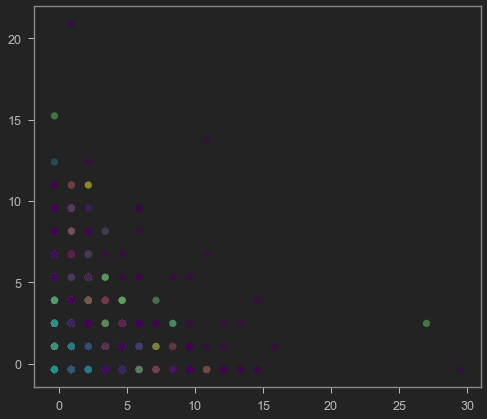

In [42]:
plt.scatter(X[:, 0], X[:, 1], c=k_pred, alpha=0.5)
plt.show()

# EM

In [72]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))


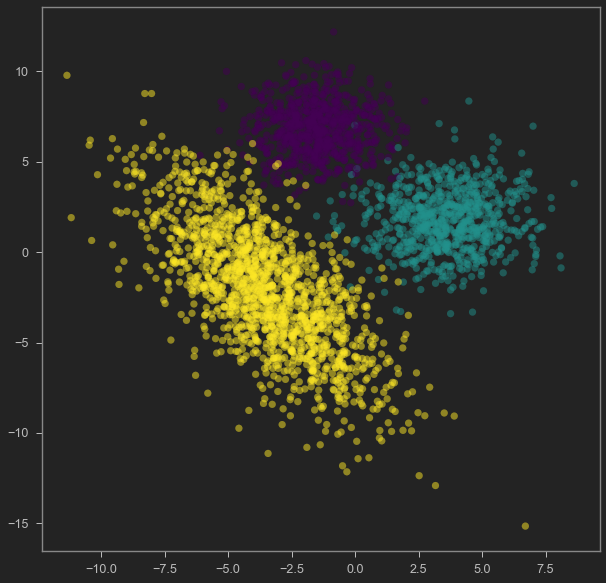

In [73]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [81]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3,random_state=42)

In [82]:
gm.fit(X)

GaussianMixture(n_components=3, random_state=42)

In [86]:
y_pred = gm.predict(X)

In [85]:
means = gm.means_
print(np.round(means).astype(np.int))

[[ 4  2]
 [-2  7]
 [-4 -2]]


### Задание 7.6.3

Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2. Числа вводите целые, без точек и запятых.

In [89]:
cluster_cnt = []
_,counts = np.unique(y_pred,return_counts=True)
for count in counts:
    cluster_cnt.append(count)

In [90]:
cluster_cnt

[744, 763, 1493]

### Задание 7.6.4

In [93]:
gm = GaussianMixture(n_components=9,random_state=123)

In [94]:
y_pred = gm.fit_predict(dfX)

In [96]:
df['label'] = y_pred

In [105]:
df.head(10)

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,4
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,4
6,0,0,0,0,0,0,0,0,0,0,...,2,0,0,2,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [106]:
gm.n_iter_

23